# COVID-19 Data Set


> ##### Antes de cargar el csv, he modificado los datos faltantes en el propio archivo, tales como 97, 99 o la fecha 9999-99-99. Así puedo trabajar más cómodo con los datos.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [78]:
df = pd.read_csv('Covid-Dataset.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


En las Boolean features, 1 significa "sí" y 2 significa "no". Valores como 97 y 99 son datos faltantes.

## Análisis exploratorio


In [79]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

- El conjunto de entrenamiento tiene 1048575 ejemplos y 20 características. 
- 5 de las features son int, 1 es un objeto (string) y el resto son float.

### Desbalanceo de clases

<AxesSubplot: xlabel='CLASIFFICATION_FINAL', ylabel='count'>

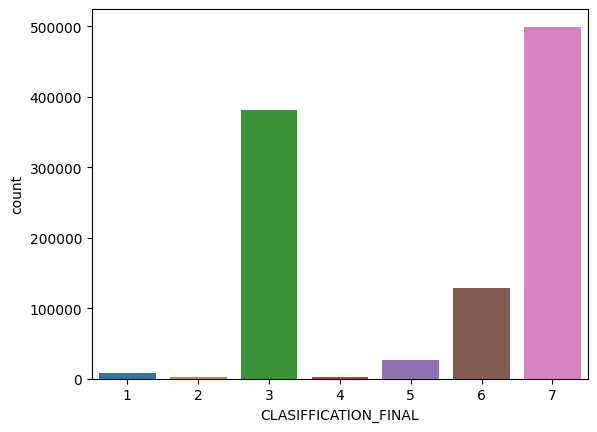

In [81]:
sns.countplot(x='CLASIFFICATION_FINAL', data=df)

Los valores 1-3 significan que el paciente fue diagnosticado con covid en diferentes grados. 4 o superior significa que el paciente no es portador de covid o que la prueba no es concluyente.

> Se observa que hay más gente cuyo diagnostico final no fue COVID. Aún así, tomamos todos los valores para tenerlos en cuenta.

### Exploración de variables

<AxesSubplot: xlabel='DATE_DIED', ylabel='count'>

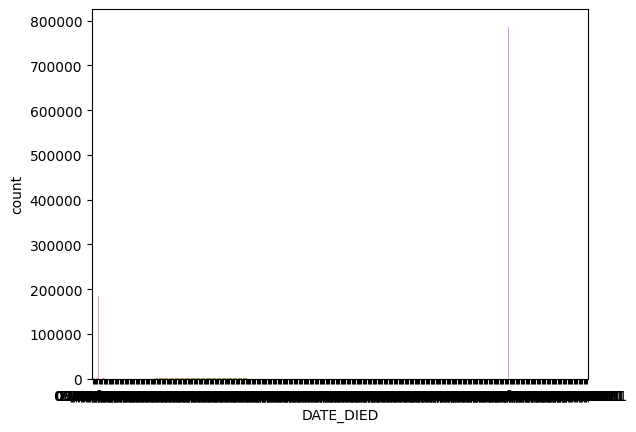

In [27]:
sns.countplot(x='DATE_DIED', data=df)

> Casi 20,000 personas sobrevivieron al virus, el resto murió

<AxesSubplot: xlabel='AGE', ylabel='count'>

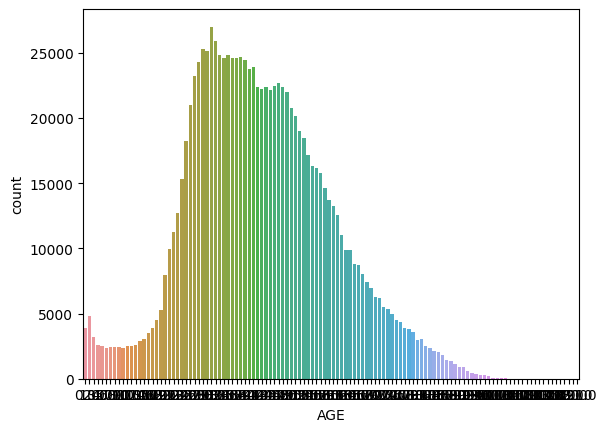

In [39]:
sns.countplot(x='AGE', data=df)

> La mayoría de los pacientes son gente joven y gente cercana a la mediana edad.

> #### A continuación, he seleccionado como ejes las variables AGE y CLASIFFICATION_FINAL para poder tener los datos más dispersados y así observalos mejor sin que se unan tanto entre ellos.

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

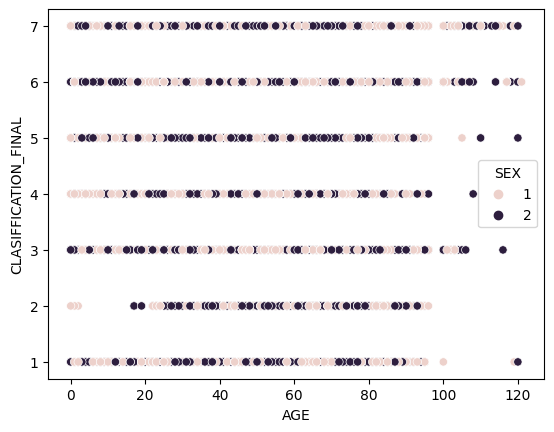

In [50]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='SEX', data=df)

> Como era de esperar, el sexo no es un causante de COVID.

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


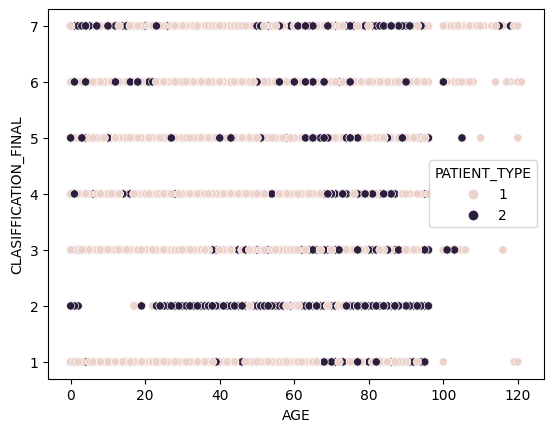

In [60]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='PATIENT_TYPE', data=df)

> La gran mayoría de los pacientes con COVID grado 2 fueron hospitalizados

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

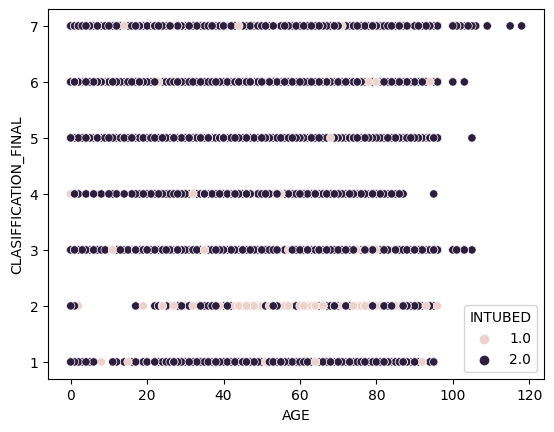

In [51]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='INTUBED', data=df)

> Los pacientes de COVID grado 2 eran más propensos a ser intubados.

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

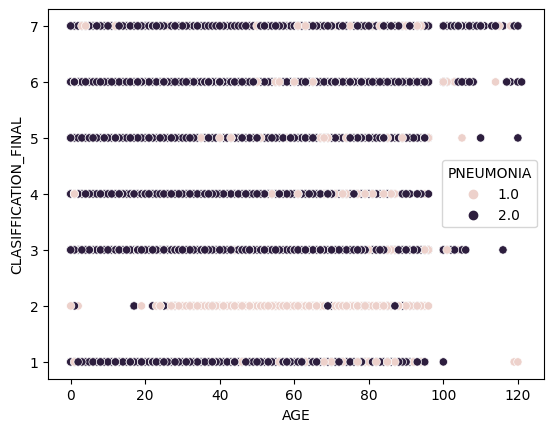

In [49]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='PNEUMONIA', data=df)

> Se puede observar una clara "dependencia" entre la neumonía y el COVID. En los pacientes con COVID grado 2, la neumonía es casi total.

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

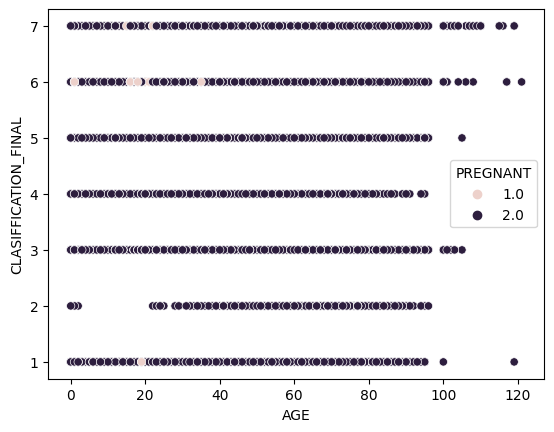

In [53]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='PREGNANT', data=df)

> No hubo casi ninguna embarazada con COVID, además de que no es causante de él.

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


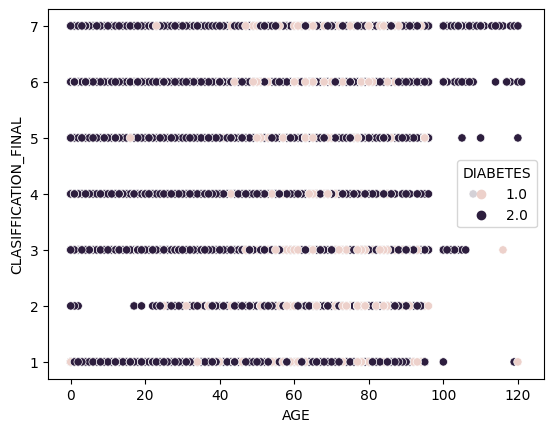

In [54]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='DIABETES', data=df)

> La gente de mediana edad en adelante es más propensa a tener diabetes, aunque no se le ve relación directa con la COVID. Como se puede ver, en los niveles 6 y 7 hay casi los mismos casos que en los niveles 2 y 3.

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


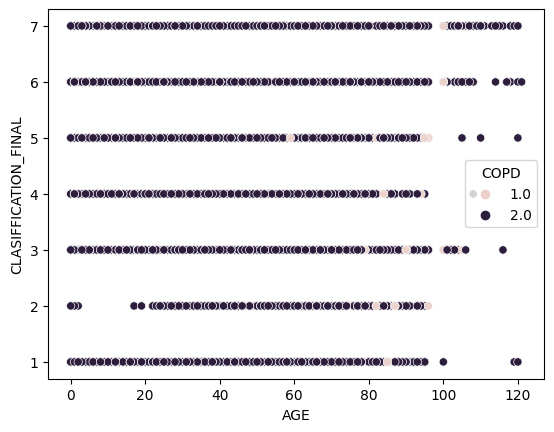

In [57]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='COPD', data=df)

> Apenas hay pacientes con COPD y encima se ve que no causa COVID.

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


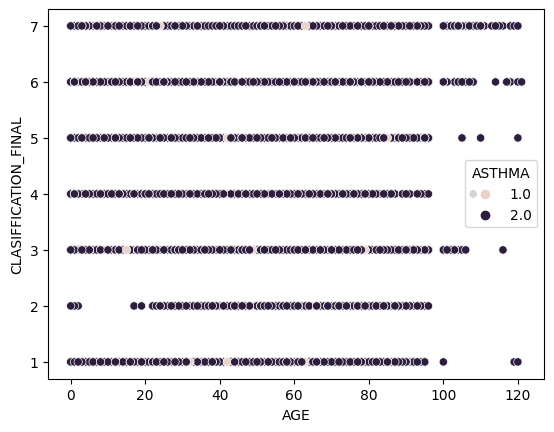

In [59]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='ASTHMA', data=df)

> No considero el asma como causante o derivación de la COVID

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


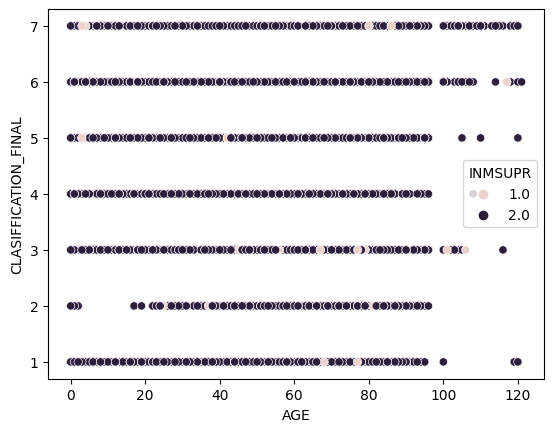

In [62]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='INMSUPR', data=df)

> Apenas hay pacientes inmunodeprimidos y no es causa ni derivación del COVID

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


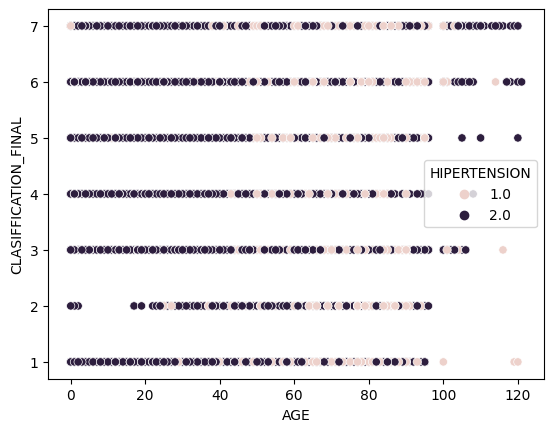

In [65]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='HIPERTENSION', data=df)

> La gente de la mediana edad en adelante tienen hipertensión pero no lo consideraría como causa del COVID

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


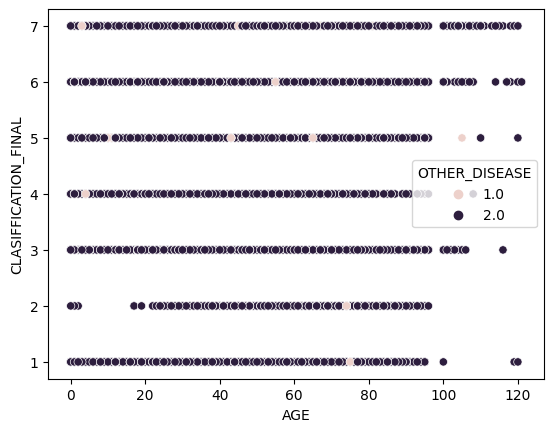

In [67]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='OTHER_DISEASE', data=df)

> Apenas habían pacientes que padecían de alguna otra enfermedad.

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


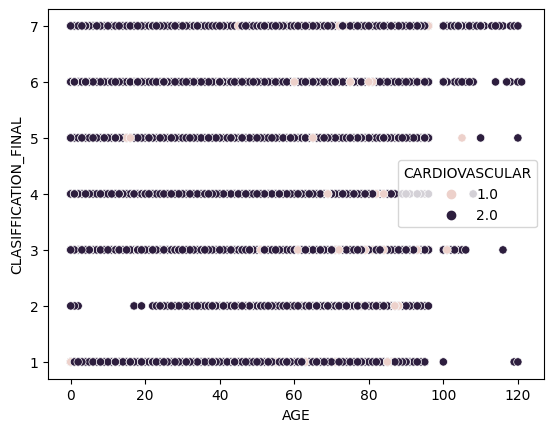

In [68]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='CARDIOVASCULAR', data=df)

> Un muy pequeño porcentaje de personas de mediana edad en adelante presenta alguna enfermedad cardiovascular.

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


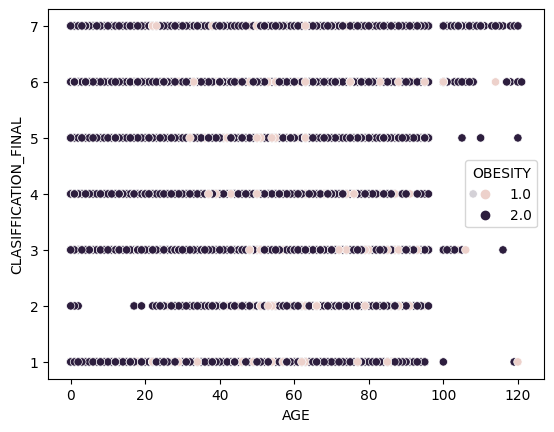

In [69]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='OBESITY', data=df)

> Un porcentaje de personas de mediana edad en adelante tiene obesidad, pero no se lo considero como causante de COVID.

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


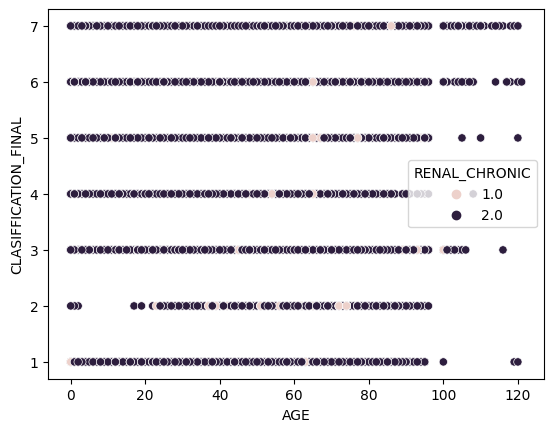

In [70]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='RENAL_CHRONIC', data=df)

> Casi ningún paciente presenta una enfermedad renal crónica, aunque si que hay un ligero aumento en el grado 2 de COVID.

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


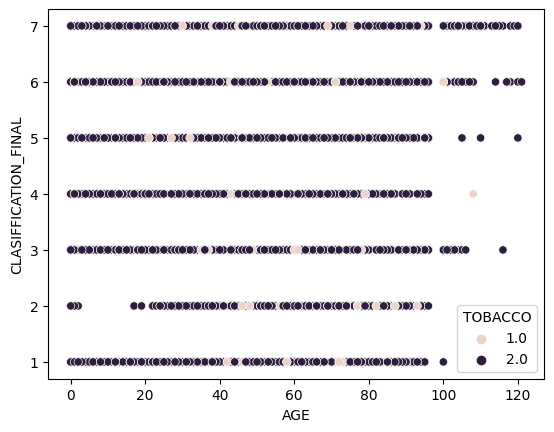

In [71]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='TOBACCO', data=df)

<AxesSubplot: xlabel='PNEUMONIA', ylabel='CLASIFFICATION_FINAL'>

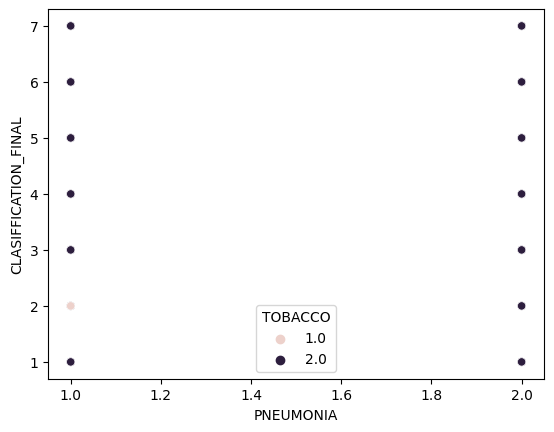

In [73]:
sns.scatterplot(x='PNEUMONIA', y='CLASIFFICATION_FINAL', hue='TOBACCO', data=df)

> En los casos de COVID se aprecia como hay más gente fumadora. Esto puede ser debido a que el virus se pueda propagar por las partículas del humo al fumar. A su vez, el tabaco está relacionado con la neumonía.

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

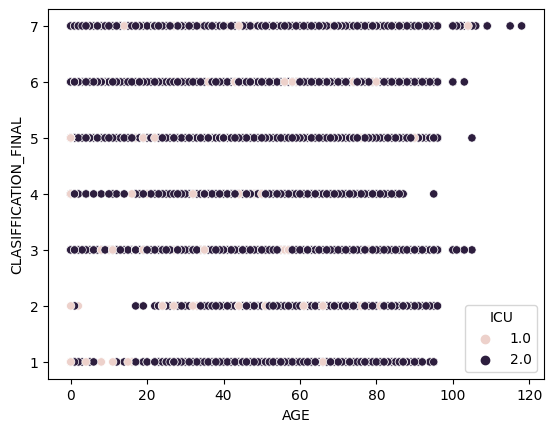

In [72]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='ICU', data=df)

> Pacientes de Covid grado 1 y 2 fueron ingresados en la Unidad de Cuidados Intensivos.

## Preprocesamiento de los datos

### Valores nulos

In [77]:
total = df.isnull().sum().sort_values(ascending=False)

percent_1 = round(df.isnull().sum()/df.isnull().count()*100, 1).sort_values(ascending=False)

missing_data = pd.concat([total, percent_1], axis=1, keys=['Total', '%'])
missing_data.head(20)

,Total,%
ICU,856032,81.6
INTUBED,855869,81.6
PREGNANT,527265,50.3
PNEUMONIA,16003,1.5
OTHER_DISEASE,5045,0.5
INMSUPR,3404,0.3
DIABETES,3338,0.3
TOBACCO,3220,0.3
HIPERTENSION,3104,0.3
CARDIOVASCULAR,3076,0.3


- La feature `` tiene solo 2 valores nulos, por lo que se pueden completar fácilmente. 
- La feature `Age` se presenta más complicada, ya que tiene 177 valores nulos. 
- La `Cabin` necesita más investigación, pero parece que podríamos querer eliminarla del conjunto de datos, ya que falta el 77%.